# Planejamento Futuro

## Iremos prever o número de passageiro aéreos no futuro.

### Dividiremos de forma adequada a base de dados e construiremos uma rede neural capaz de realizar previsões. 

In [1]:
#importando a base de dados e as bibliotecas para uso
import pandas as pd
import seaborn as sns
import matplotlib as mpl

#setando os parametros para os gráficos do matplotlib
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

passageiros = pd.read_csv('Passageiros.csv')

In [2]:
#visualizando a serie temporal
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

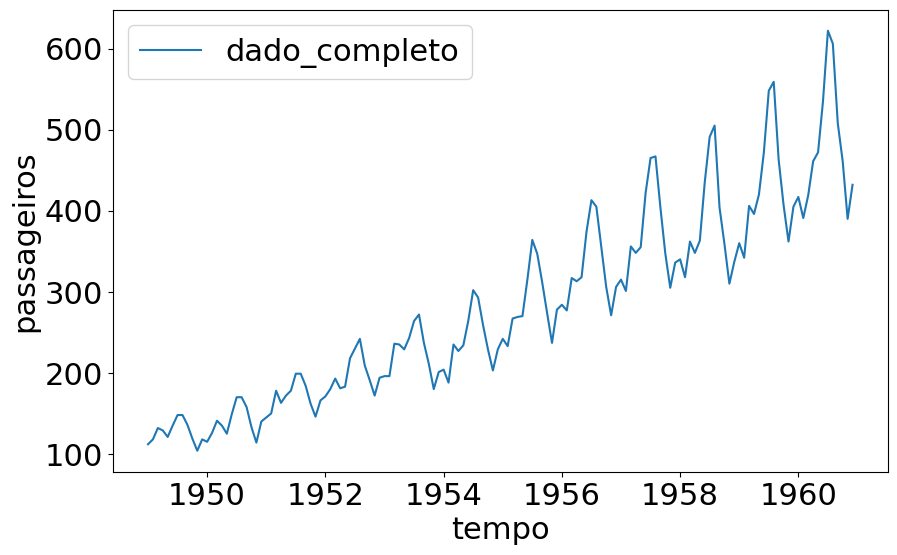

In [3]:
#plotando os dados de serie temporal
sns.lineplot(x='tempo', y='passageiros', data=passageiros,label='dado_completo')

In [4]:
#precisamos escalar os dados, converter os dados proximos a 0 para um melhor intendimento e processamento da rede neural
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [5]:
#ajustando os dados para o StandardScaler entender como os dados estão expostos
sc.fit(passageiros)

StandardScaler()

In [6]:
#dados escalados
dado_escalado = sc.transform(passageiros)

In [7]:
#passando para as variáveis x e y os dados da primeira e segunda coluna transformados.
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<AxesSubplot:>

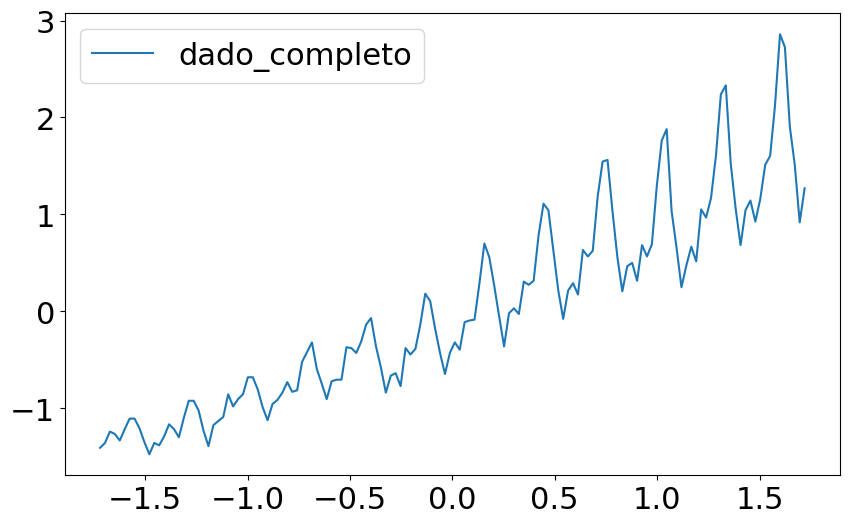

In [8]:
#plotando os dados transformados.
sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')

Text(0.5, 0, 'Tempo')

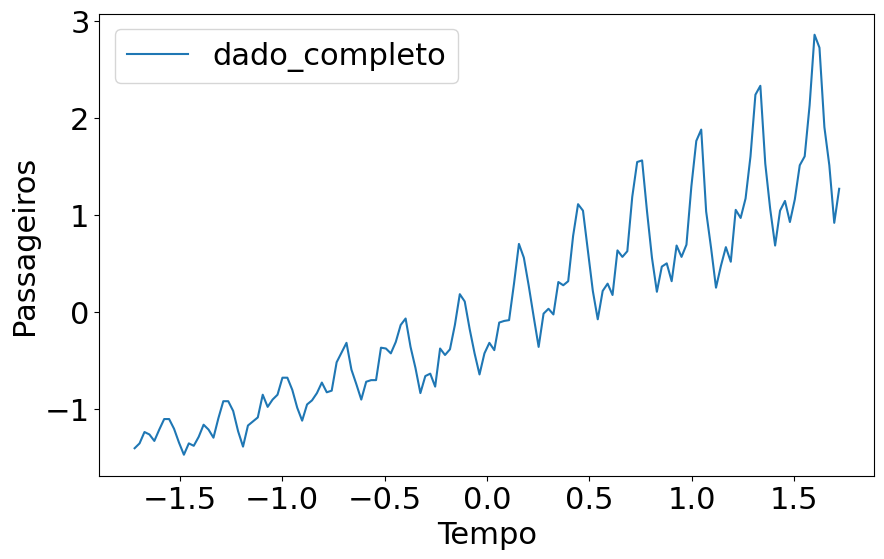

In [9]:
#adicionando legendas no gráfico
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [10]:
#dividindo os dados em treino e teste

#setando 90% dos dados para treino e 10% para teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [11]:
#dividindo o dados para variáveis x e y treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [12]:
#dividindo o dados para variáveis x e y teste
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

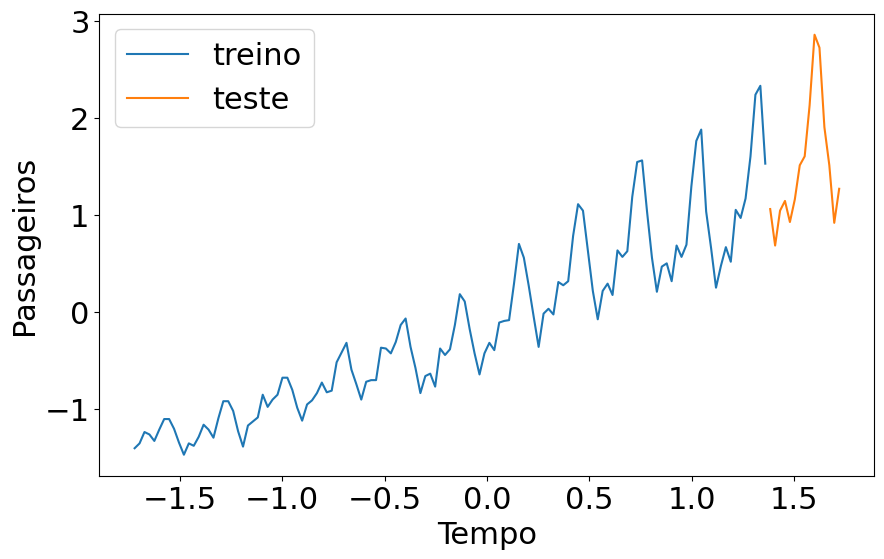

In [13]:
#plotando os dados de treino
sns.lineplot(x=xtreino, y=ytreino,label='treino')
#plotando os dados de teste
sns.lineplot(x=xteste, y=yteste,label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [14]:
#utilizamos uma rede neural em conjuto com uma regressão linear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()

## Criação da sequencia de camada da rede neural

In [15]:
#inicializando a rede neural com a entrada dos dados
#passamos os pesos e os vieses para a rede neural
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', 
                    activation = 'linear',use_bias=False))

In [16]:
#compiltando a estrutura da rede, erro medio quadratico, junto com o adam, otimizador de pesos
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
#resumo da rede neural

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [18]:
#refinando os parâmetros com base nos dados de treino, ou seja, encontraremos as melhores combinações
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 6ms/step - loss: 0.1285


In [19]:
#visualizando a estimativa de treino

y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 6ms/step


Text(0.5, 0, 'Tempo')

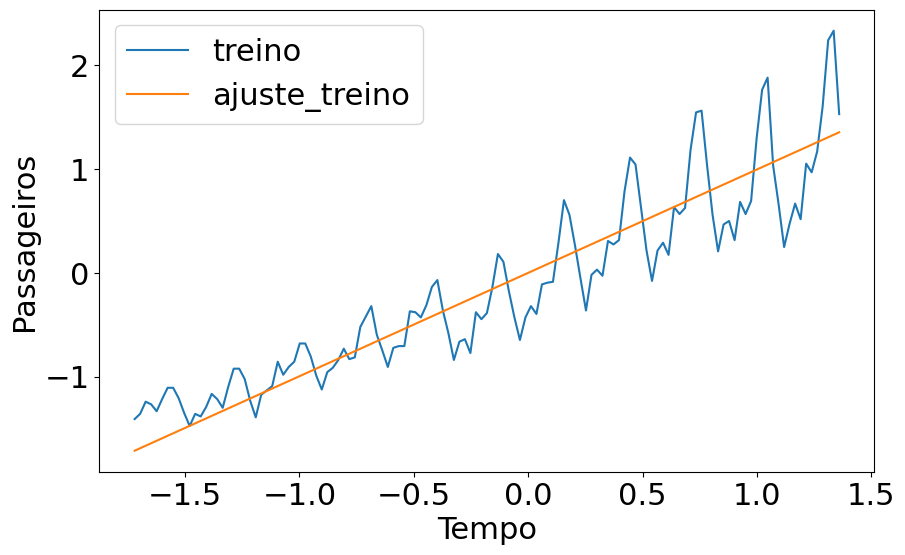

In [20]:
#plotando os resultados
sns.lineplot(x=xtreino, y=ytreino,label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [21]:
#voltaremos os dados para visualizar a quantidade de passageiros
#criaremos um data frame para visualizar os dados.

d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}


In [22]:
resultados = pd.DataFrame(data=d)

In [23]:
resultados

,tempo,passageiros
0,-1.720064,-1.712533
1,-1.696007,-1.688581
2,-1.671950,-1.664630
3,-1.647894,-1.640678
4,-1.623837,-1.616727
...,...,...
124,1.262984,1.257454
125,1.287041,1.281406
126,1.311098,1.305357
127,1.335155,1.329309


In [24]:
#transformação inversa para visualizar os dados

resultado_transf = sc.inverse_transform(resultados)

In [25]:
#alocando os dados no dataframe
resultado_transf = pd.DataFrame(resultado_transf)

In [26]:
#nomeando as colunas do dataframe
resultado_transf.columns = ['tempo', 'passageiros']

In [27]:
resultado_transf

,tempo,passageiros
0,1949.000000,75.566947
1,1949.083333,78.430329
2,1949.166667,81.293712
3,1949.250000,84.157080
4,1949.333333,87.020477
...,...,...
124,1959.333333,430.626050
125,1959.416667,433.489447
126,1959.500000,436.352815
127,1959.583333,439.216184


Text(0.5, 0, 'Tempo')

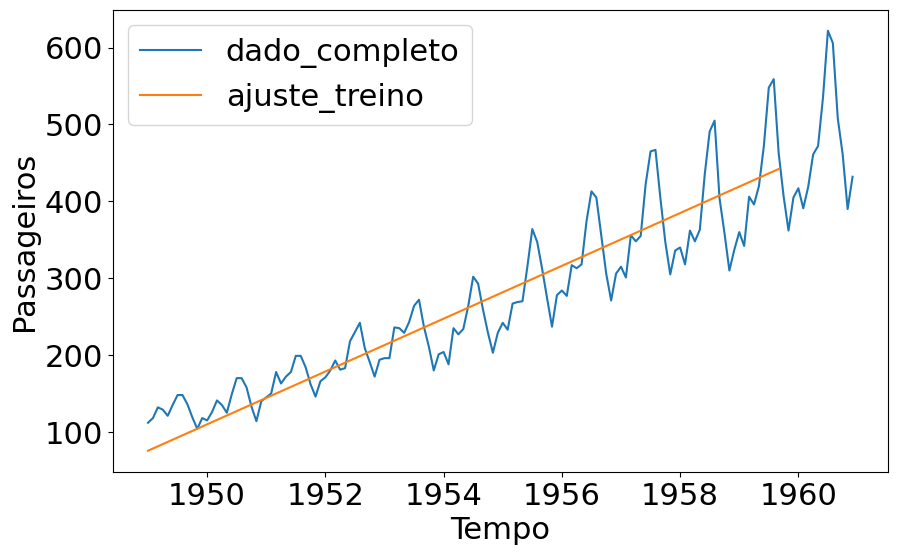

In [28]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [29]:
#variavel temporária para os dados de testes
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 65ms/step


In [30]:
#adicionando no dataframe
d = {'tempo':xteste, 'passageiros': y_predict_teste[:,0]}
resultado_teste = pd.DataFrame(data=d)

In [31]:
#transformação inversa para visualizar
resultado_transf_teste = sc.inverse_transform(resultado_teste)

In [32]:
#adicionando no dataframe os dados invertidos
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)

In [33]:
#nomeando as colunas do dataframe
resultado_transf_teste.columns = ['tempo', 'passageiros']

Text(0.5, 0, 'Tempo')

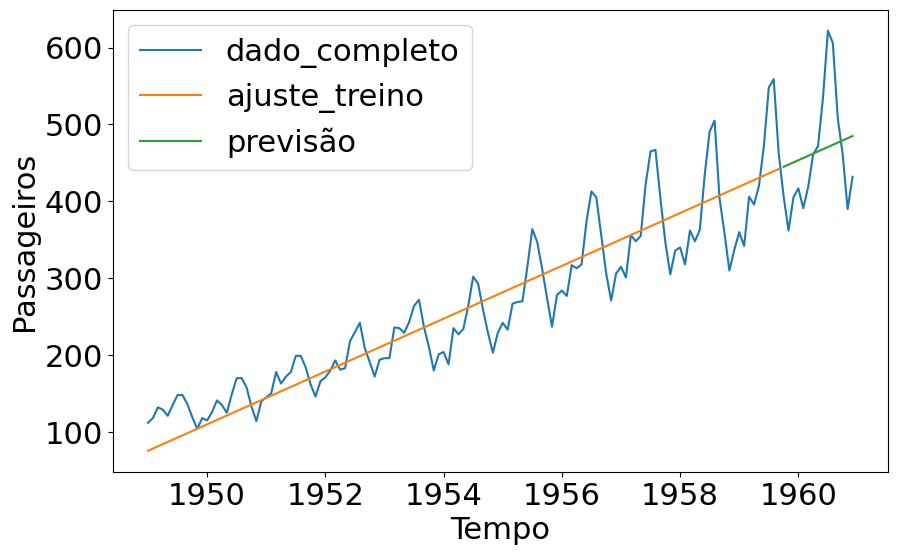

In [34]:
#plotando os dados
sns.lineplot(x='tempo', y='passageiros',data=passageiros,label='dado_completo')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf,label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros',data=resultado_transf_teste,label='previsão')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

### O algoritimo aprendeu a construir a reta com os dados treino que estão na mesma faixa dos dados de teste

# Otimizaremos o algoritimo

## Criando uma nova rede neural com estruturas de camados, ou seja, adicionaremos mais neuronios no algoritmo


In [35]:
#criando um novo regressor
regressor2 = Sequential()

In [36]:
#algoritimo com 8 camadas/8 neuronios

#regressor de entrada
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
#regressor/camada escondida
regressor2.add(Dense(8, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
#regressor de saida
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

In [37]:
#compilando o algoritimo

regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
#sumario da rede neural
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


# foram criados 8 neuronios e na próxima camada mais 8 neuronios interligados, gerando o total de 64 ligações.

# 8 ligações para saida, no qual temos um total de 80 parâmetros treinaveis.

In [39]:
#como aumentamos a estrutura do algoritimo, utilizamos 200 epocas para treinar e não 5 como padrão
regressor2.fit(xtreino,ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 6ms/step - loss: 0.8058
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 0.8012
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7996
Epoch 4/500
5/5 [==============================] - 0s 7ms/step - loss: 0.8001
Epoch 5/500
5/5 [==============================] - 0s 5ms/step - loss: 0.8002
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7996
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7984
Epoch 8/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7973
Epoch 9/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7963
Epoch 10/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7946
Epoch 11/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7934
Epoch 12/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7914
Epoch 13/500
5/5 [==============================] - 0s 5ms/s

5/5 [==============================] - 0s 6ms/step - loss: 0.7540
Epoch 105/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7540
Epoch 106/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7532
Epoch 107/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7523
Epoch 108/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7512
Epoch 109/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7503
Epoch 110/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7497
Epoch 111/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7488
Epoch 112/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7481
Epoch 113/500
5/5 [==============================] - 0s 5ms/step - loss: 0.7476
Epoch 114/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7464
Epoch 115/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7464
Epoch 116/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.5159
Epoch 207/500
5/5 [==============================] - 0s 6ms/step - loss: 0.5120
Epoch 208/500
5/5 [==============================] - 0s 6ms/step - loss: 0.5078
Epoch 209/500
5/5 [==============================] - 0s 7ms/step - loss: 0.5042
Epoch 210/500
5/5 [==============================] - 0s 6ms/step - loss: 0.5005
Epoch 211/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4969
Epoch 212/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4932
Epoch 213/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4899
Epoch 214/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4853
Epoch 215/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4801
Epoch 216/500
5/5 [==============================] - 0s 6ms/step - loss: 0.4754
Epoch 217/500
5/5 [==============================] - 0s 7ms/step - loss: 0.4703
Epoch 218/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.1816
Epoch 309/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1803
Epoch 310/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1789
Epoch 311/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1778
Epoch 312/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1766
Epoch 313/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1755
Epoch 314/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1742
Epoch 315/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1726
Epoch 316/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1713
Epoch 317/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1703
Epoch 318/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1695
Epoch 319/500
5/5 [==============================] - 0s 8ms/step - loss: 0.1687
Epoch 320/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.1351
Epoch 411/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1351
Epoch 412/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1351
Epoch 413/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1352
Epoch 414/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1352
Epoch 415/500
5/5 [==============================] - 0s 8ms/step - loss: 0.1351
Epoch 416/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1349
Epoch 417/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1348
Epoch 418/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1348
Epoch 419/500
5/5 [==============================] - 0s 7ms/step - loss: 0.1347
Epoch 420/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1347
Epoch 421/500
5/5 [==============================] - 0s 6ms/step - loss: 0.1347
Epoch 422/500
5/5 [==============================] - 0

In [40]:
#prevendo os valores de treino
y_predict = regressor2.predict(xtreino)

5/5 [==============================] - 0s 5ms/step


In [41]:
#prevendo os valores de teste
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 63ms/step


Text(0.5, 0, 'Tempo')

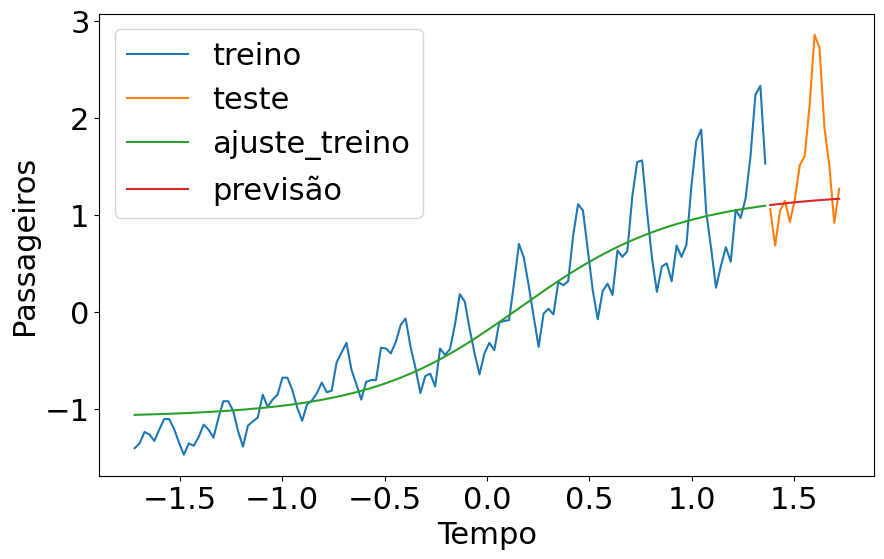

In [42]:
#plotando os dados
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

# Terminada essa predição, vemos que a resposta é um pouco diferente da reta, ela não é uma resposta ótima, definitivamente, mas, trabalhando aqui na estrutura da rede neural, vamos conseguindo, gradualmente, refinar a nossa resposta.

# parâmetros alterados no algoritimo de linear para sigmoid

# ------------------------------------------------------------

# Utilizando vetor para percorrer os dados de entrada

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [44]:
import numpy as np

In [45]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [46]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [47]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [48]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [49]:
vetor2 = pd.DataFrame(yteste)[0]

In [50]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

# dados estruturados, iremos criar uma nova rede neural

In [51]:
#novo regressor para previsões
regressor3 = Sequential()

In [52]:
#repassando parâmetros para o novo regressor/rede neural
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [53]:
#ajuste de rede
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.7833
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7589
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7412
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7206
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7005
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6760
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6537
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6255
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5978
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5653
Epoch 11/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5282
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4897
Epoch 13/100
4/4 [==============================] - 0s 7ms/s

In [54]:
#predição e plotagem do resultado
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 8ms/step


<AxesSubplot:xlabel='tempo', ylabel='0'>

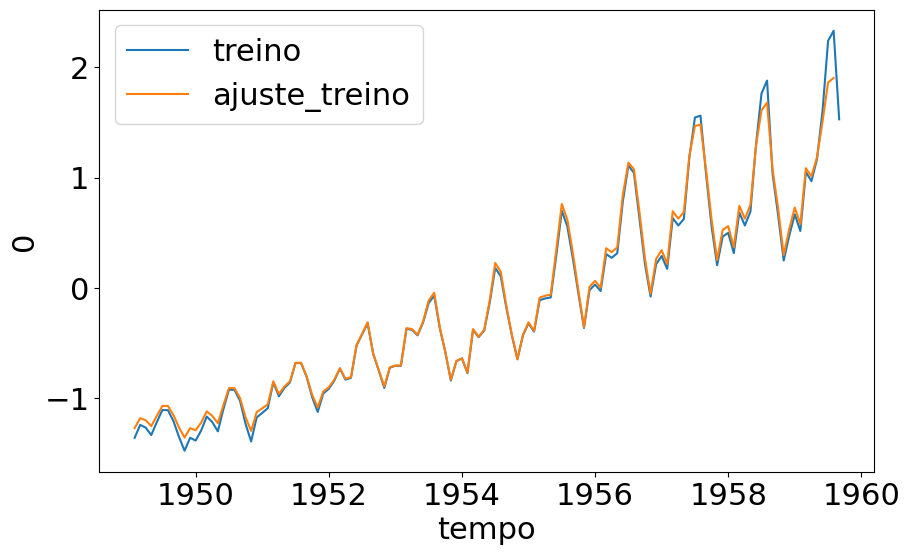

In [55]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [56]:
#predição dos dados de teste
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 154ms/step


In [57]:
#atribuindo o resultado acima em uma variável
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

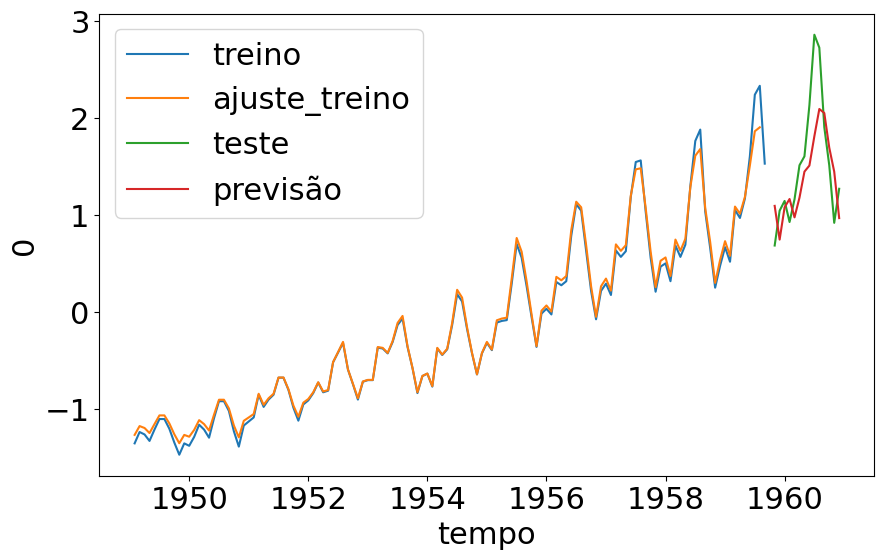

In [58]:
#plotagem do resultado
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

In [59]:
#utilizando a função com vetor
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [60]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [61]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [62]:
#utilizando a função com vetor2
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [63]:
#Criando uma nova rede
regressor4 = Sequential()

In [64]:
#repassando parâmetros para o novo regressor/rede neural
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [65]:
#ajuste de rede
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 1s 6ms/step - loss: 0.7886
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 0.7649
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 0.7582
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.7567
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7552
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7532
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 0.7475
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7420
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7364
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7282
Epoch 11/300
4/4 [==============================] - 0s 8ms/step - loss: 0.7209
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 0.7107
Epoch 13/300
4/4 [==============================] - 0s 10ms

4/4 [==============================] - 0s 6ms/step - loss: 0.0986
Epoch 105/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0980
Epoch 106/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0972
Epoch 107/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0967
Epoch 108/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0961
Epoch 109/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0956
Epoch 110/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0950
Epoch 111/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0943
Epoch 112/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0936
Epoch 113/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0938
Epoch 114/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0926
Epoch 115/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0921
Epoch 116/300
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 0.0661
Epoch 207/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 208/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0658
Epoch 209/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0657
Epoch 210/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0655
Epoch 211/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0655
Epoch 212/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0658
Epoch 213/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0652
Epoch 214/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0651
Epoch 215/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0649
Epoch 216/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0651
Epoch 217/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0647
Epoch 218/300
4/4 [==============================] -

In [66]:
#predição
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 198ms/step


In [67]:
#resultado em um dataframe
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

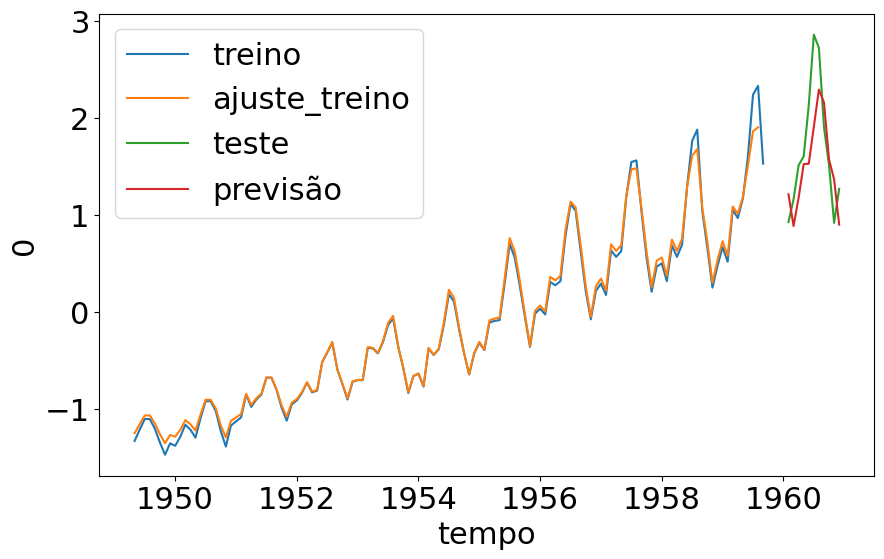

In [68]:
#plotagem do resultado
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Um novo problema

### Nosso objetivo será prever quantas bicicletas serão alugadas no futuro

In [69]:
#carregando uma nova base de dados
bike = pd.read_csv('bicicletas.csv')

In [70]:
#platando os dados
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [71]:
#convertendo as datas
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

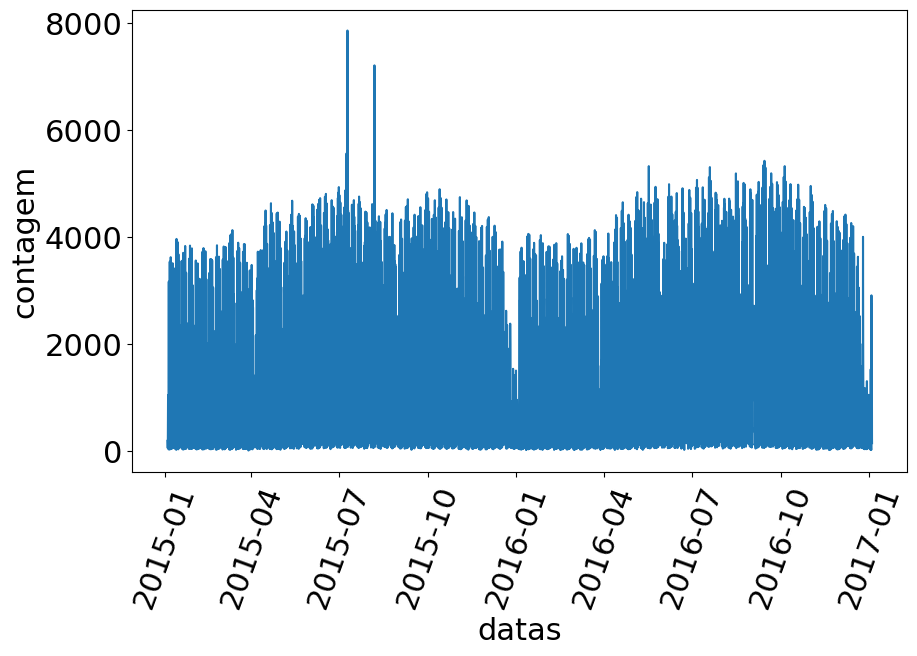

In [72]:
#visualizando os dados
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [73]:
#escalando os dados
sc2 = StandardScaler()

In [74]:
#ajuste dos dados
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [75]:
#criando a saída da rede neural
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [76]:
#dividindo o dado em treino e teste 90% para treino e 10% para teste
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

In [77]:
#y treino
ytreino = y[0:tamanho_treino]

In [78]:
#y teste
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

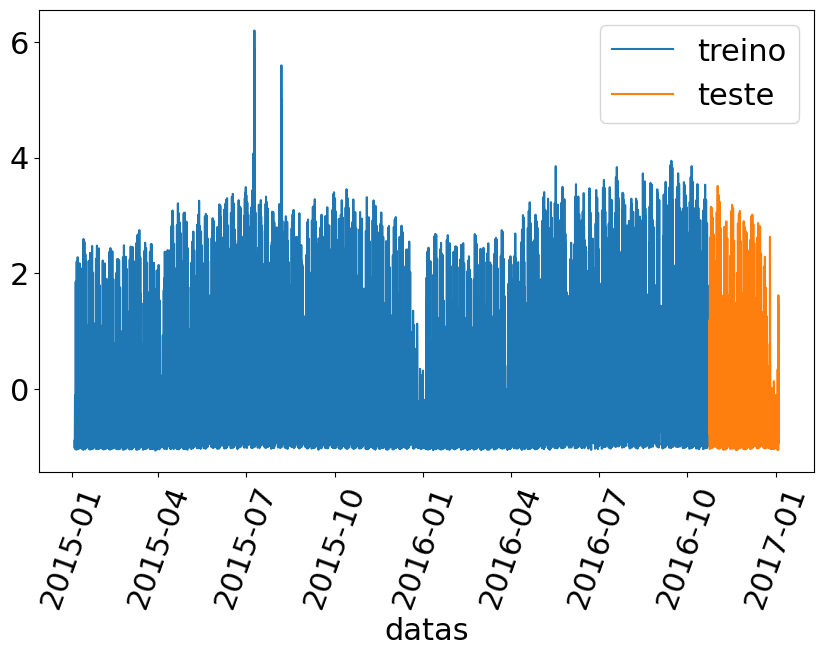

In [79]:
#visualizando a saida
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [116]:
#separando os dados treino
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [117]:
#separa os dados de teste
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [118]:
#matriz tridimencional para a rede neural
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [119]:
#matriz tridimencional para a rede neural
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [120]:
#import LSTM
from tensorflow.keras.layers import LSTM

In [121]:
#Sequencia de camadas
recorrente = Sequential()

In [122]:
#rede neural recorrente
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],
                                      xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [123]:
#copilando a rede
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [124]:
#reajuste LSTM
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 27s 47ms/step - loss: 0.2508 - val_loss: 0.0718
Epoch 2/100
490/490 [==============================] - 23s 47ms/step - loss: 0.0731 - val_loss: 0.0421
Epoch 3/100
490/490 [==============================] - 23s 48ms/step - loss: 0.0547 - val_loss: 0.0340
Epoch 4/100
490/490 [==============================] - 24s 48ms/step - loss: 0.0472 - val_loss: 0.0341
Epoch 5/100
490/490 [==============================] - 24s 48ms/step - loss: 0.0430 - val_loss: 0.0414
Epoch 6/100
490/490 [==============================] - 24s 48ms/step - loss: 0.0404 - val_loss: 0.0272
Epoch 7/100
490/490 [==============================] - 24s 48ms/step - loss: 0.0382 - val_loss: 0.0322
Epoch 8/100
490/490 [==============================] - 24s 49ms/step - loss: 0.0367 - val_loss: 0.0264
Epoch 9/100
490/490 [==============================] - 25s 50ms/step - loss: 0.0352 - val_loss: 0.0224
Epoch 10/100
490/490 [==============================] - 24s 49ms/step - l

Epoch 96/100
490/490 [==============================] - 23s 46ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 97/100
490/490 [==============================] - 23s 46ms/step - loss: 0.0163 - val_loss: 0.0167
Epoch 98/100
490/490 [==============================] - 23s 47ms/step - loss: 0.0161 - val_loss: 0.0179
Epoch 99/100
490/490 [==============================] - 23s 46ms/step - loss: 0.0160 - val_loss: 0.0139
Epoch 100/100
490/490 [==============================] - 23s 46ms/step - loss: 0.0159 - val_loss: 0.0158


In [125]:
#ajustando os dados
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 12s 20ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

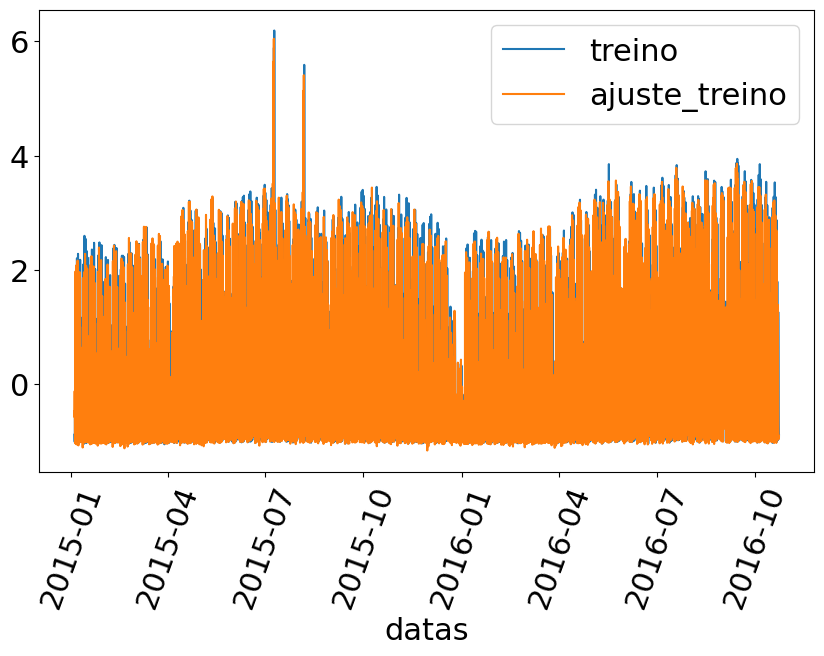

In [126]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [127]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 1s 18ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

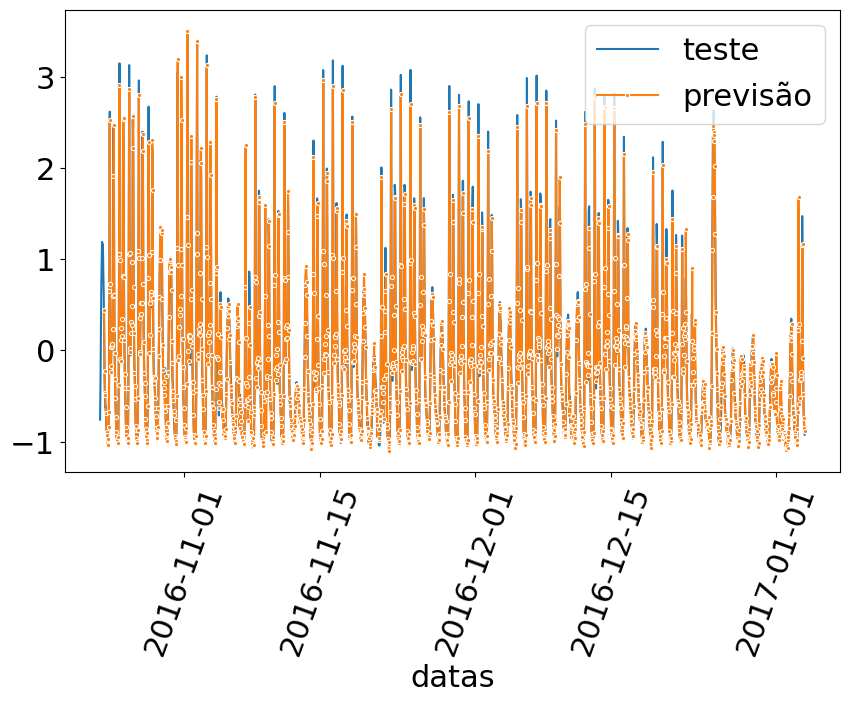

In [128]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

In [129]:
from tensorflow.keras.layers import GRU

In [130]:
recorrente_g = Sequential()

In [131]:
recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [132]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [133]:
recorrente_g.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 128)               50304     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [134]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 31s 48ms/step - loss: 0.2072 - val_loss: 0.0516
Epoch 2/100
490/490 [==============================] - 21s 43ms/step - loss: 0.0636 - val_loss: 0.0404
Epoch 3/100
490/490 [==============================] - 23s 46ms/step - loss: 0.0479 - val_loss: 0.0289
Epoch 4/100
490/490 [==============================] - 22s 46ms/step - loss: 0.0416 - val_loss: 0.0304
Epoch 5/100
490/490 [==============================] - 21s 43ms/step - loss: 0.0383 - val_loss: 0.0255
Epoch 6/100
490/490 [==============================] - 20s 42ms/step - loss: 0.0359 - val_loss: 0.0320
Epoch 7/100
490/490 [==============================] - 22s 45ms/step - loss: 0.0344 - val_loss: 0.0229
Epoch 8/100
490/490 [==============================] - 24s 50ms/step - loss: 0.0330 - val_loss: 0.0208
Epoch 9/100
490/490 [==============================] - 24s 48ms/step - loss: 0.0318 - val_loss: 0.0189
Epoch 10/100
490/490 [==============================] - 27s 56ms/step - l

Epoch 80/100
490/490 [==============================] - 20s 41ms/step - loss: 0.0166 - val_loss: 0.0148
Epoch 81/100
490/490 [==============================] - 20s 41ms/step - loss: 0.0164 - val_loss: 0.0182
Epoch 82/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 83/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0166 - val_loss: 0.0150
Epoch 84/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0160 - val_loss: 0.0144
Epoch 85/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0161 - val_loss: 0.0164
Epoch 86/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0159 - val_loss: 0.0180
Epoch 87/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 88/100
490/490 [==============================] - 20s 40ms/step - loss: 0.0160 - val_loss: 0.0174
Epoch 89/100
490/490 [==============================] - 20s 40ms

In [135]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 3s 16ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

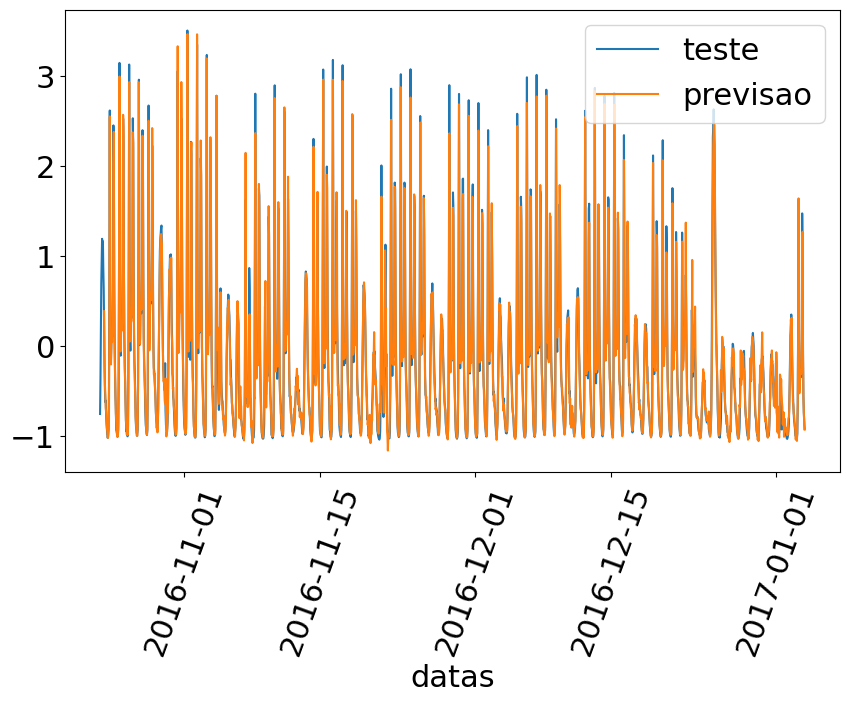

In [140]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],label='previsao')
plt.xticks(rotation=70)

In [141]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


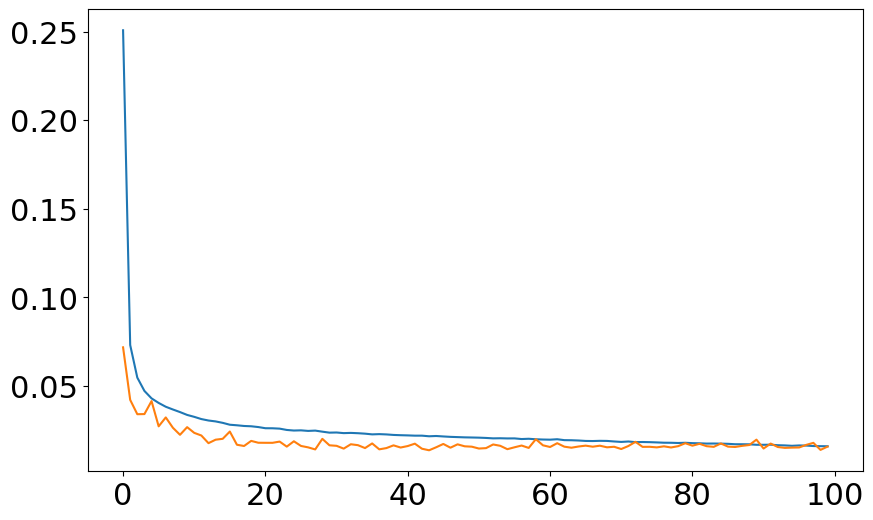

In [142]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])